In [1]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import math


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Load the dataset
df = pd.read_csv("Salary_dataset.csv")

# Display first few rows

print(df.head())




   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [3]:
# i - example (of range m)
# j - feature (of range n)

# f_wb = w * x[i] + b

# i need to
# compute cost
# compute gradient
# compute gradient descent


In [4]:
# using x and not X here because it is a 1-D array
# (there is only one x per row and i didn't convert it to matrix so it is a vector)
x_train = df["YearsExperience"]

y_train = df["Salary"]
for i in range(len(y_train)):
    y_train[i] = y_train[i] / 1000
    
df.rename(columns={"Salary": "Salary (in 1000$)"}, inplace=True)
print(y_train)


0      39.344
1      46.206
2      37.732
3      43.526
4      39.892
5      56.643
6      60.151
7      54.446
8      64.446
9      57.190
10     63.219
11     55.795
12     56.958
13     57.082
14     61.112
15     67.939
16     66.030
17     83.089
18     81.364
19     93.941
20     91.739
21     98.274
22    101.303
23    113.813
24    109.432
25    105.583
26    116.970
27    112.636
28    122.392
29    121.873
Name: Salary, dtype: float64


C:\Users\sashk\AppData\Local\Temp\ipykernel_32244\3092583280.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = y_train[i] / 1000
C:\Users\sashk\AppData\Local\Temp\ipykernel_32244\3092583280.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = y_train[i] / 1000
C:\Users\sashk\AppData\Local\Temp\ipykernel_32244\3092583280.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = y_train[i] / 1000
C:\User

In [5]:
def compute_cost(x, y, w, b):
    m = len(x)

    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        loss = (f_wb - y[i])**2

        cost += loss

    return cost / (2 * m)

In [6]:
def compute_gradient(x, y, w, b):
    m = len(x)

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [7]:
# why are we even using derivative and what are we getting with it exactly

initial_w = 9
initial_b = 40

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)

print(tmp_dj_dw, tmp_dj_db)

65.33291999999999 12.716


In [8]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    w = w_in
    b = b_in

    J_history = []
    w_history = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(x, y, w, b)
        J_history.append(cost)

        # if i is, for example, 20 | 20 % ceil(95 / 10) = 0 (20 % 10 = 0)
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)

    return w, b, J_history, w_history
        

In [9]:
w, b, _, _ = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, 0.052, 100)
print(compute_cost(x_train, y_train, w, b))

18.483122683529984


In [10]:
predicted = []
m = len(x_train)
for i in range(m):
    # remember that f_wb is a funciton of prediction; now that we have computed w and b, we can predict the x values
    predicted.append(w * x_train[i] + b)

Text(0.5, 0, 'Years of experience')

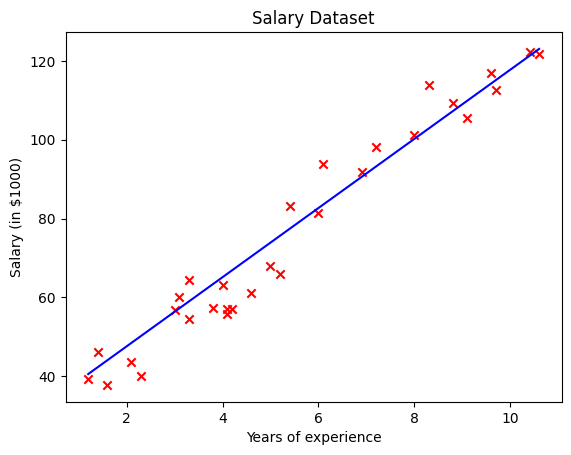

In [11]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")
# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Salary Dataset")
# Set the y-axis label
plt.ylabel('Salary (in $1000)')
# Set the x-axis label
plt.xlabel('Years of experience')

In [12]:
print(f"For 2 years of experience we predict a salary of {predicted[2]}")
print(f"Actual salary: {y_train[2]}")

For 2 years of experience we predict a salary of 44.00464754243839
Actual salary: 37.732
